LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/diabetes.csv')
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


APPLYING PCA ( Principal component analysis )

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df1 = pd.read_csv('/content/diabetes.csv')

# Separate features and target
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Outcome'] = y

Plotting principal components

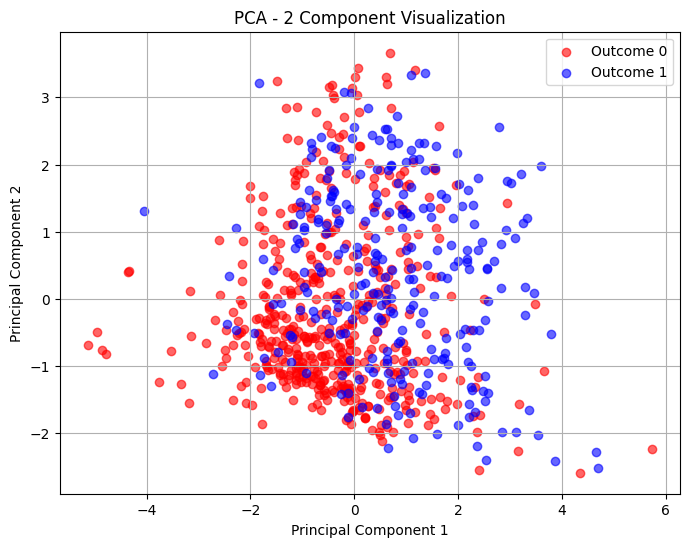

In [7]:
# Plot the principal components
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']

for label, color in zip([0, 1], colors):
    plt.scatter(
        pca_df[pca_df['Outcome'] == label]['PC1'],
        pca_df[pca_df['Outcome'] == label]['PC2'],
        c=color, label=f'Outcome {label}', alpha=0.6
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Component Visualization')
plt.legend()
plt.grid(True)
plt.show()